In [1]:
import numpy as np
import os
import time
import argparse


import torch 
from torch import nn as nn
from torch.nn import functional as F

import torchvision
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#PREPARE FROM WHICH MODEL DATA SHOULD BE USED
eps = 0.15
dataset = "F-MNIST"
adv = "box"
target = 0.16
seed = 12345
exppath = "models/"
pre_trained = True


if pre_trained:
    exppath += "pre-trained/"

In [3]:
mode = "PGD"
adv_list = torch.load(exppath+ dataset + "/bounds/{0}_seed_{1}_target_{2}_eps_{3}_bounds_{4}.tar.pth".format(adv,seed,target,eps,mode))["bounds"]

mode = "GAINS"
gains_list = torch.load(exppath+ dataset + "/bounds/{0}_seed_{1}_target_{2}_eps_{3}_bounds_{4}.tar.pth".format(adv,seed,target,eps,mode))["bounds"]

mode = "GAINS-Linear"
linear_list = torch.load(exppath+ dataset + "/bounds/{0}_seed_{1}_target_{2}_eps_{3}_bounds_{4}.tar.pth".format(adv,seed,target,eps,mode))["bounds"]

mode = "GAINS-Box"
box_list = torch.load(exppath+ dataset + "/bounds/{0}_seed_{1}_target_{2}_eps_{3}_bounds_{4}.tar.pth".format(adv,seed,target,eps,mode))["bounds"]

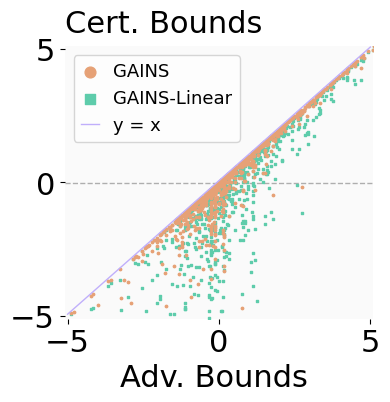

In [4]:
fig, ax = plt.subplots(figsize=(4,4))
pal = [(152. / 255., 68. / 255., 100. / 255.),
       (94. / 255., 204. / 255., 171. / 255.), (205./255., 205./255., 205./255.),
       (86./255., 100./255., 26./255.), (192./255., 175./255., 251./255.), (230./255., 161./255., 118./255.), (0./255., 103./255., 138./255.)]


fontsize = 22
plt.axhline(y = -0.014, color = 'k', linestyle = '--', alpha = 0.3, linewidth = 1)
lenn = 1000
alphaa = 1
#ax.scatter(adv_list[0:lenn], box_list[0:lenn],  marker='v', color=pal[0],s = 3,label = "GAINS-Box", alpha = 0.5)
ax.scatter(adv_list[0:lenn], gains_list[0:lenn],  marker='o', color=pal[5],s = 3,label = "GAINS", alpha = alphaa, zorder = 4)
ax.scatter(adv_list[0:lenn], linear_list[0:lenn],  marker='s', color=pal[1],s = 3,label = "GAINS-Linear",alpha =alphaa,zorder = 3)



plt.ylabel(r"Cert. Bounds".format(eps,target),rotation=0 , fontsize=fontsize,ha="left")
ax.yaxis.set_label_coords(0.0, 1.03)
plt.xlabel(r"Adv. Bounds ", fontsize=fontsize)
#if args.dataset == "MNIST":

linspace = np.arange(-5,5.1,5)
plt.xticks(linspace)
temp = np.arange(-5,5.1,5) 

ax.set_ylim([-5.1,5.1])
ax.set_xlim([-5.1,5.1])
ax.set_ylim([-5.1,5.1])
ax.set_xlim([-5.1,5.1])
ax.plot(linspace,linspace+ 0.07,linewidth = 1, color = pal[4],label = "y = x",zorder = 5)


#lgnd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize-5,frameon=False, handlelength=1)
lgnd = ax.legend(loc='upper left',  fontsize=fontsize-9,frameon=True, handlelength=1)

lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]
lgnd.legendHandles[2]._sizes = [60]

plt.yticks(temp)
ax.set_facecolor( (0.98, 0.98, 0.98) )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.setp(ax.get_xticklabels(), fontsize=fontsize)
plt.setp(ax.get_yticklabels(), fontsize=fontsize)
fig.tight_layout()
fig_name = "plots/bound_tightness_scatter"
#plt.savefig(fig_name+".png", bbox_inches="tight")
#plt.savefig(fig_name + ".pdf", bbox_inches="tight")

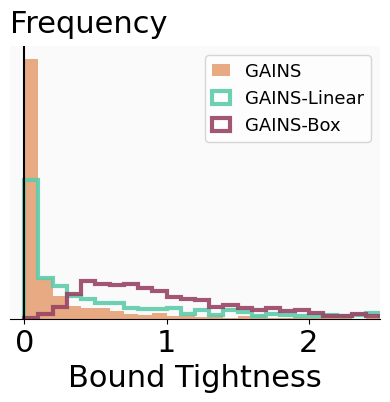

In [5]:

def plot_bound_tightness_for_network(adv_list,linear_list,box_list,gains_list):
    fig, ax = plt.subplots(figsize=(4, 4))
    fontsize = 22
    
    bins = np.arange(-0.00,3.01,0.1)
    
    linear_bound_diff = np.array(adv_list) - np.array(linear_list)
    box_bound_diff = np.array(adv_list) - np.array(box_list)
    gains_bound_diff = np.array(adv_list) - np.array(gains_list)
    
    ax.hist(gains_bound_diff, bins=bins, density=True, alpha=0.9, label="GAINS", color=pal[5], histtype='stepfilled')
    ax.hist(linear_bound_diff, bins=bins, density=True, alpha=0.9, label="GAINS-Linear", color=pal[1], histtype="step",linewidth = 3)
    ax.hist(box_bound_diff, bins=bins, density=True, alpha=0.9, label="GAINS-Box", color=pal[0], histtype='step', linewidth=3)
    
    ax.axvline(0,0,1,color="k")

    # plt.ylim([0.5,20])
    ax.set_ylabel('Frequency', fontsize=fontsize, ha="left", rotation=0)
    ax.set_xlabel("Bound Tightness", fontsize=fontsize)
    ax.yaxis.set_label_coords(0.0, 1.03)

    plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    plt.setp(ax.get_yticklabels(), fontsize=fontsize)
    ax.set_yticks([])
    ax.set_xticks(np.arange(-2,3+0.001,1.0))
    ax.set_xlim([-0.1,2.5])
    ax.set_facecolor((0.98, 0.98, 0.98))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(False)
    fig.tight_layout()


    plt.legend(loc='upper right', fontsize=fontsize-9,
          frameon=True, handlelength=1)

    fig_name = "plots/bound_tightness_histo"
    #plt.savefig(fig_name+".png", bbox_inches="tight")
    #plt.savefig(fig_name + ".pdf", bbox_inches="tight")
    
plot_bound_tightness_for_network(adv_list,linear_list,box_list,gains_list)